<h1>Satellites - Exploratory Data Analysis with Inference</h1>
<h4>Blake Rayvid - <a href=https://github.com/brayvid>https://github.com/brayvid</a></h4>

Dataset: https://www.kaggle.com/datasets/sujaykapadnis/every-known-satellite-orbiting-earth

## Read and clean data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcParams["figure.dpi"] = 144
import seaborn as sns
from matplotlib import ticker
from wordcloud import WordCloud
from datetime import datetime
from matplotlib.patches import Patch

In [2]:
# Check out the columns
df = pd.read_csv('UCS-Satellite-Database-1-1-2023.csv',encoding='windows-1252')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 68 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6718 non-null   object 
 1   Current Official Name of Satellite  6718 non-null   object 
 2   Country/Org of UN Registry          6718 non-null   object 
 3   Country of Operator/Owner           6718 non-null   object 
 4   Operator/Owner                      6718 non-null   object 
 5   Users                               6718 non-null   object 
 6   Purpose                             6718 non-null   object 
 7   Detailed Purpose                    1167 non-null   object 
 8   Class of Orbit                      6718 non-null   object 
 9   Type of Orbit                       6077 non-null   object 
 10  Longitude of GEO (degrees)          6716 non-null   float64
 11  Perigee (km)                        6718 no

In [3]:
# Show how many elements of each column are NaN
df.isna().sum().head(50)

Name of Satellite, Alternate Names       0
Current Official Name of Satellite       0
Country/Org of UN Registry               0
Country of Operator/Owner                0
Operator/Owner                           0
Users                                    0
Purpose                                  0
Detailed Purpose                      5551
Class of Orbit                           0
Type of Orbit                          641
Longitude of GEO (degrees)               2
Perigee (km)                             0
Apogee (km)                              0
Eccentricity                             0
Inclination (degrees)                    0
Period (minutes)                        44
Launch Mass (kg.)                      243
 Dry Mass (kg.)                       6274
Power (watts)                         6137
Date of Launch                           0
Expected Lifetime (yrs.)              1914
Contractor                               0
Country of Contractor                    0
Launch Site

In [4]:
# Investigate the unnamed columns unique values - what are these columns for?
eval("[df[f'Unnamed: {i}'].value_counts() for i in range(37,68)]")

[Unnamed: 37
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 38
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 39
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 40
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 41
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 42
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 43
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 44
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 45
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 46
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 47
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 48
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 49
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 50
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 51
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 52
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 53
 Estimated    484
 Name: count, dtype: int6

In [5]:
df['Comments'].value_counts().head(20)

Comments
Lemur surveillance of satellites or LEO.                                                              86
Sensing surveillance of satellites in LEO.                                                            39
Next generation expected to last to 2030                                                              30
C surveillance of satellites in LEO.                                                                  18
Remote surveillance of satellites in LEO.                                                             14
ICEYE surveillance of satellites r  LEO.                                                              14
High Resolution Optical Imaging                                                                       13
Thought to be for intelligence gathering.                                                             11
Part of Beidou constellation.                                                                         10
Unknown mission.                              

In [6]:
df['Source'].value_counts()

Source
https://spaceflightnow.com/2021/01/24/spacex-launches-record-setting-rideshare-mission-with-143-small-satellites/                            74
https://spaceflightnow.com/2021/03/14/spacex-extends-its-own-rocket-reuse-record-on-starlink-launch/                                         60
https://spaceflightnow.com/2021/04/29/spacex-launches-60-more-starlink-spacecraft-fcc-clears-spacex-to-fly-satellites-at-lower-altitudes/    60
https://spaceflightnow.com/2021/04/07/spacex-launches-its-100th-mission-from-floridas-space-coast/                                           60
https://spaceflightnow.com/2021/03/11/spacex-adds-more-satellites-to-starlink-internet-fleet/                                                60
                                                                                                                                             ..
https://hiber.global/press/hiber-4/                                                                                              

In [7]:
# Drop unneeded columns with high nan counts
df = df.drop(labels=[f'Unnamed: {i}' for i in range(37,68)], axis=1)
df = df.drop(labels=['Unnamed: 28'], axis=1)
df = df.drop(labels=['Source','Source.1','Source.2','Source.3','Source.4','Source.5','Source.6'], axis=1)
df = df.drop(labels=[' Dry Mass (kg.) ','Power (watts)'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6718 non-null   object 
 1   Current Official Name of Satellite  6718 non-null   object 
 2   Country/Org of UN Registry          6718 non-null   object 
 3   Country of Operator/Owner           6718 non-null   object 
 4   Operator/Owner                      6718 non-null   object 
 5   Users                               6718 non-null   object 
 6   Purpose                             6718 non-null   object 
 7   Detailed Purpose                    1167 non-null   object 
 8   Class of Orbit                      6718 non-null   object 
 9   Type of Orbit                       6077 non-null   object 
 10  Longitude of GEO (degrees)          6716 non-null   float64
 11  Perigee (km)                        6718 no

In [8]:
# Investigate the unique values in several columns
df['Purpose'].value_counts()

Purpose
Communications                                    4812
Earth Observation                                 1142
Technology Development                             366
Navigation/Global Positioning                      141
Space Science                                       98
Technology Demonstration                            42
Earth Science                                       22
Surveillance                                        14
Navigation/Regional Positioning                     13
Unknown                                             10
Earth Observation/Navigation                         9
Space Observation                                    9
Earth Observation/Technology Development             7
Communications/Maritime Tracking                     5
Communications/Technology Development                5
Earth Observation                                    4
Earth Observation/Communications                     2
Earth/Space Observation                              2
Mi

In [9]:
df['Detailed Purpose'].value_counts()

Detailed Purpose
Optical Imaging                                          470
Electronic Intelligence                                  129
Meteorology, Automatic Identification System (AIS)       128
Radar Imaging                                             86
Earth Science                                             58
Meteorology                                               50
Automatic Identification System (AIS)                     36
Hyperspectral Imaging                                     21
Multispectral Imaging                                     20
Internet of Things (IoT)                                  19
Earth Science/Meterology                                  18
Radar Imaging (SAR)                                       15
Amateur Radio                                             14
Infrared Imaging                                          12
Radar Imaging/Earth Science                                8
Video Imaging                                              7
Data Re

In [10]:
df['Expected Lifetime (yrs.)'].value_counts()

Expected Lifetime (yrs.)
4.00     2872
5.00      704
15.00     423
3.00      246
2.00      122
8.00       84
12.00      83
10.00      83
7.00       77
1.00       26
14.00      15
18.00      13
13.00      12
11.00       6
16.00       6
20.00       5
9.00        5
0.50        4
6.00        4
0.25        3
1.50        2
30.00       2
7.25        2
17.00       1
25.00       1
2.50        1
12.50       1
4.50        1
Name: count, dtype: int64

In [11]:
df['Date of Launch'].value_counts()

Date of Launch
13-01-2022    93
24-01-2021    91
30-06-2021    78
14-03-2021    63
13-06-2020    60
              ..
16-06-2004     1
29-10-2000     1
23-11-2009     1
30-11-2009     1
09-01-2012     1
Name: count, Length: 1187, dtype: int64

In [12]:
df['Operator/Owner'].value_counts().head(50)

Operator/Owner
SpaceX                                                                                3349
OneWeb Satellites                                                                      502
Planet Labs, Inc.                                                                      195
Chinese Ministry of National Defense                                                   147
Spire Global Inc.                                                                      127
Ministry of Defense                                                                    113
Swarm Technologies                                                                      84
Iridium Communications, Inc.                                                            75
Chang Guang Satellite Technology Co. Ltd.                                               53
National Reconnaissance Office (NRO)                                                    50
China Academy of Space Technology (CAST)                                   

In [13]:
len(df['Operator/Owner'].unique())

639

In [14]:
df['Users'].value_counts()

Users
Commercial                        5272
Government                         541
Military                           443
Civil                              154
Government/Commercial               97
Military/Commercial                 81
Military/Government                 56
Government/Civil                    44
Military/Civil                       7
Government/Military                  4
Commercial/Civil                     4
Civil/Government                     4
Civil/Military                       3
Commercial/Military                  2
Commercial                           1
Government                           1
Civil/Commercial                     1
Government/Commercial/Military       1
Commercial/Government                1
Military                             1
Name: count, dtype: int64

In [15]:
df['Launch Mass (kg.)'].value_counts().head(50)

Launch Mass (kg.)
260      2962
148       503
227       434
4         206
10        186
2         113
1          77
860        75
6          64
9          53
100        52
5          47
45         45
3          41
700        39
280        39
800        35
300        30
500        27
5,000      25
1,000      23
8          23
80         23
12         22
43         22
15         22
1,415      21
2,500      20
55         20
110        17
20         17
2,300      16
50         16
40         16
4,200      15
4,500      15
95         14
650        13
1,600      13
3,200      13
2,217      13
3,000      12
172        12
1,630      12
723        12
225        11
70         11
42         11
5,200      11
4,000      11
Name: count, dtype: int64

In [16]:
len(df['Launch Mass (kg.)'].unique())

567

In [17]:
df['Type of Orbit'].value_counts()

Type of Orbit
Non-Polar Inclined       3740
Sun-Synchronous          1510
Polar                     748
Equatorial                 38
Molniya                    23
Deep Highly Eccentric       9
Elliptical                  8
Cislunar                    1
Name: count, dtype: int64

In [18]:
df['Period (minutes)'].value_counts() # Need to convert to float

Period (minutes)
95.6      1262
95.4      1020
91.5       511
1436.1     198
94.5       170
          ... 
115.89       1
115.87       1
116.02       1
98.35        1
106.59       1
Name: count, Length: 579, dtype: int64

In [19]:
df['Eccentricity'].describe()

count    6718.000000
mean        0.391619
std        14.122881
min        -0.033400
25%         0.000202
50%         0.000329
75%         0.000943
max       575.000000
Name: Eccentricity, dtype: float64

In [20]:
index_to_drop = df[df['Eccentricity'] < 0].index # There is one entry with a negative eccentricity. Eccentricity is always non-negative.
df = df.drop(index=index_to_drop)

In [21]:
# Organize Users
df['UsedCivil'] = df['Users'].str.contains('civil', case=False)
df['UsedCommercial'] = df['Users'].str.contains('commercial', case=False)
df['UsedGovernment'] = df['Users'].str.contains('government',case=False)
df['UsedMilitary'] = df['Users'].str.contains('military',case=False)

In [22]:
# Remove commas from mass and convert to float
df["MassKg"] = df['Launch Mass (kg.)'].str.replace(",","").astype(float)
df['MassKg'].value_counts()

MassKg
260.0     2962
148.0      503
227.0      434
4.0        206
10.0       188
          ... 
1955.0       1
1064.0       1
4860.0       1
3695.0       1
2110.0       1
Name: count, Length: 565, dtype: int64

In [23]:
# Remove commas from period and convert to float
df['PeriodMinutesFl'] = df['Period (minutes)'].str.replace(",","").astype(float)
df['PeriodMinutesFl'].head()

0      96.08
1      94.70
2      95.90
3    1436.03
4    1436.10
Name: PeriodMinutesFl, dtype: float64

In [24]:
# One entry had year '018' - change it to 2018
df['Date of Launch'][330] = '11/29/2018'

<ipython-input-24-e69d93b61add>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date of Launch'][330] = '11/29/2018'


In [25]:
# Extract year from date of launch and save as new column
df['LaunchYear'] = pd.DatetimeIndex(df['Date of Launch']).year

In [26]:
# Calculate expected mission end year
df['ExpectedEndYear'] = df['LaunchYear'] + df['Expected Lifetime (yrs.)']

## Descriptive questions

#### What time range does the dataset include?

In [27]:
print(f"This dataset covers the years {min(df['LaunchYear'])} to {max(df['LaunchYear'])}.")

This dataset covers the years 1974 to 2022.


#### How many satellites are currently orbiting Earth?

In [28]:
expected_ended = df[df['ExpectedEndYear'] < 2024]
print(f'There are at least {len(df)-len(expected_ended)} active satellites orbiting Earth.')

There are at least 6006 active satellites orbiting Earth.


#### How many satellites are no longer operational?

In [29]:
print(f'{len(expected_ended)} satellites from this dataset are likely decommissioned, or {round(100*len(expected_ended)/len(df),1)}% of the total.')

711 satellites from this dataset are likely decommissioned, or 10.6% of the total.


#### What is the average lifespan of the satellites?

In [30]:
avg_lifespan = df['Expected Lifetime (yrs.)'].mean()
print(f'The average satellite lifetime is {round(avg_lifespan)} years.')

The average satellite lifetime is 6 years.


#### How many satellites are used for Earth observation purposes?

In [31]:
earth_obs = df[df['Purpose'].str.contains("earth observation", case=False)]
num_earth_obs = len(earth_obs)
print(f'{num_earth_obs} satellites are used for Earth observation, which is {round(100*num_earth_obs/len(df),1)}% of the total.')

1167 satellites are used for Earth observation, which is 17.4% of the total.


#### What is the average mass of the satellites?

In [32]:
avg_mass = df['MassKg'].mean()
print(f'The average satellite mass is {round(avg_mass)} kg.')

The average satellite mass is 666 kg.


#### What is the breakdown of satellite users by sector?

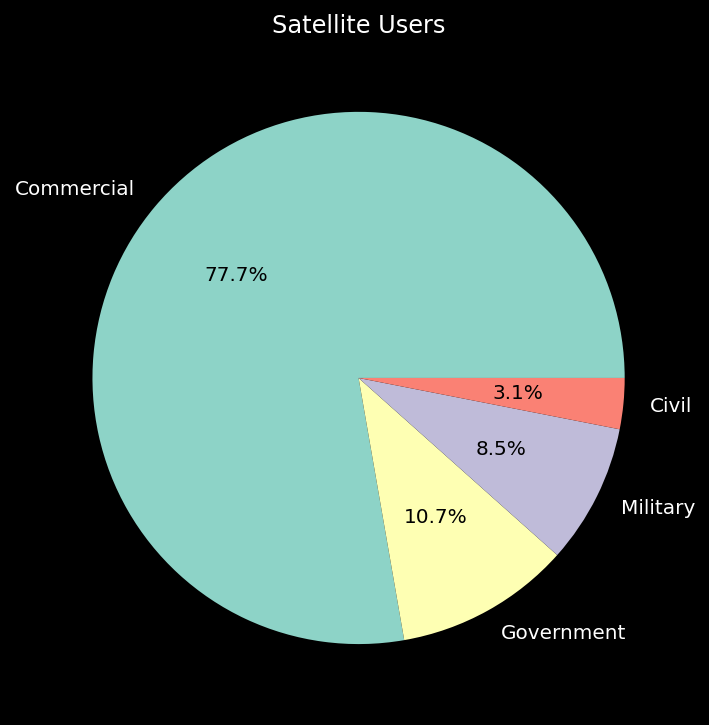

In [33]:
used_percent = []
cats = ['UsedCommercial', 'UsedGovernment','UsedMilitary', 'UsedCivil']
for x in cats:
  used_percent.append(100*sum(df[x])/len(df))
plt.style.use("dark_background")
plt.figure(figsize=(6,6))

# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
def func(pct):
    absolute = int(np.round(pct/100.*np.sum(used_percent)))
    return f"{pct:.1f}%"


# https://stackoverflow.com/questions/27898830/python-how-to-change-autopct-text-color-to-be-white-in-a-pie-chart
_, _, autotexts = plt.pie(labels=['Commercial','Government','Military','Civil'],x=used_percent, autopct=func)
for autotext in autotexts:
    autotext.set_color('black')

plt.title('Satellite Users')
plt.show()

#### What are the satellites' primary purposes?

In [34]:
def plot_word_cloud_dict(d, title):
  wordcloud = WordCloud(collocations=False,width=1600, height=800, prefer_horizontal=1).generate_from_frequencies(d)

  # plot the WordCloud image
  plt.figure(figsize=(16,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.title(title)
  plt.show()

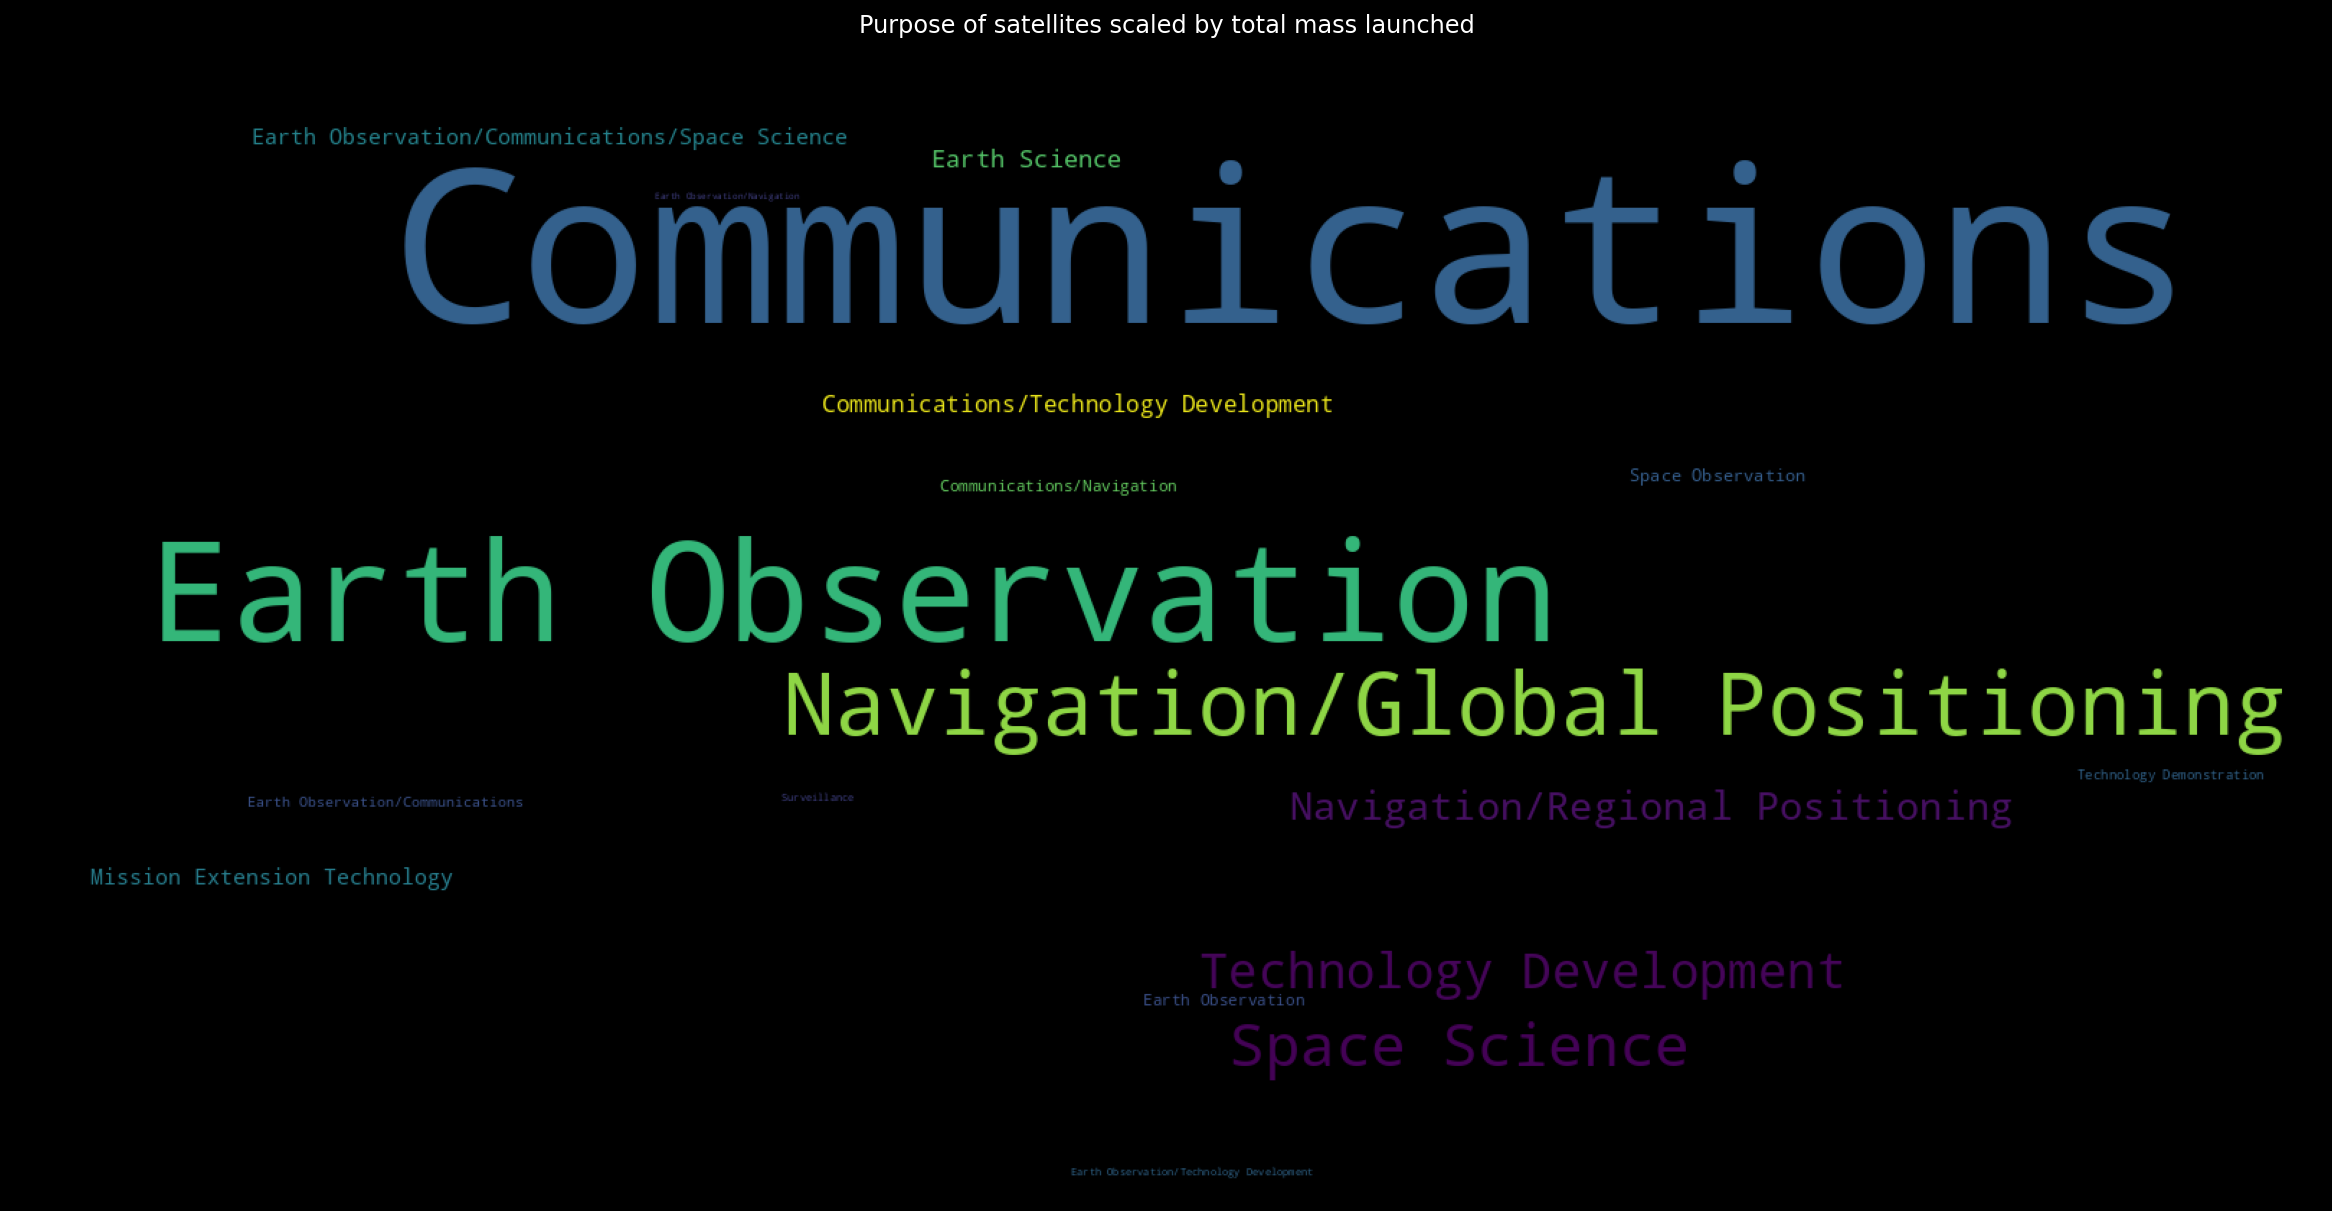

In [35]:
mass_purpose_df = df[['Purpose','MassKg']].groupby(['Purpose']).sum()
mass_purpose_df = mass_purpose_df[mass_purpose_df['MassKg'] > 0]
mass_purpose_df['MassKg'] = mass_purpose_df['MassKg'].astype(int)
mass_purpose_dict = mass_purpose_df.to_dict(index=['Purpose'])['MassKg']
mass_purpose_dict

plot_word_cloud_dict(mass_purpose_dict,'Purpose of satellites scaled by total mass launched')

#### What is the distribution of satellites by their launch year?

In [36]:
# First count number of launches of each type of satellite to date
df['AggValue'] = 1
has_launch_date_df = df.dropna(subset='LaunchYear')
has_launch_date_year_counts = has_launch_date_df.pivot_table(values='AggValue', index='LaunchYear', columns='Purpose', aggfunc=np.sum).cumsum()

end_counts = has_launch_date_year_counts[has_launch_date_year_counts.index == 2022]
end_counts = end_counts.sort_values(by=2022,axis=1,ascending=False)
end_counts

Purpose,Communications,Earth Observation,Technology Development,Navigation/Global Positioning,Space Science,Technology Demonstration,Earth Science,Surveillance,Unknown,Earth Observation/Navigation,...,Earth Science/Earth Observation,Earth/Space Observation,Educational,Mission Extension Technology,Navigation/Regional Positioning,Platform,Satellite Positioning,Space Science/Technology Demonstration,Space Science/Technology Development,Technology Development/Educational
LaunchYear,,,,,,,,,,,,,,,,,,,,,
2022,4812.0,1141.0,366.0,141.0,98.0,42.0,22.0,14.0,10.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


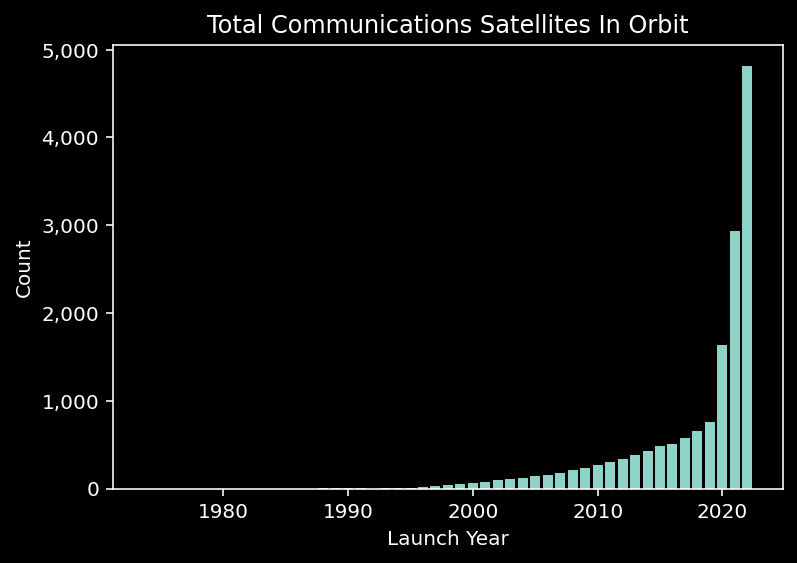

In [37]:
# Now plot total satellites in orbit over time for each top category
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(x=has_launch_date_year_counts.index, height=has_launch_date_year_counts['Communications'])
plt.xlabel('Launch Year')
plt.ylabel('Count')
plt.title('Total Communications Satellites In Orbit')
plt.style.use("dark_background")
# https://stackoverflow.com/questions/25973581/how-to-format-axis-number-format-to-thousands-with-a-comma
thousands_format = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(thousands_format)
plt.show()

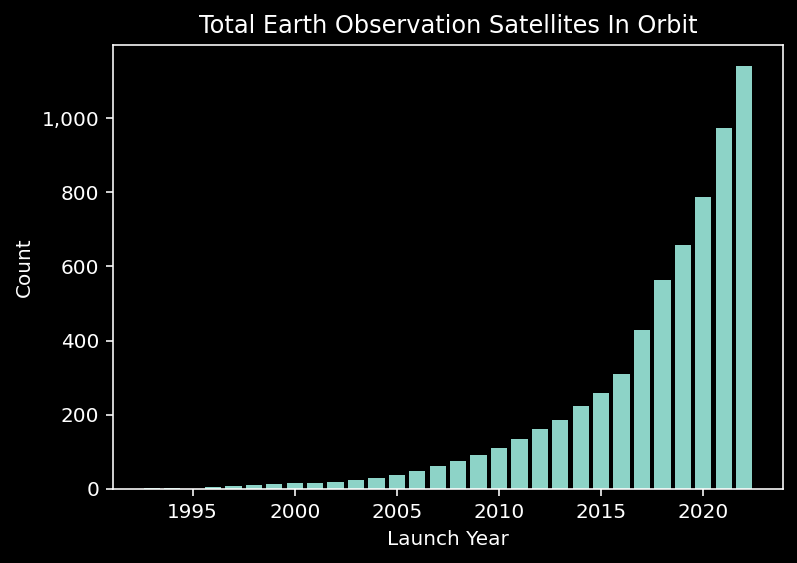

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(x=has_launch_date_year_counts.index, height=has_launch_date_year_counts['Earth Observation'])
plt.xlabel('Launch Year')
plt.ylabel('Count')
plt.title('Total Earth Observation Satellites In Orbit')
plt.style.use("dark_background")
ax.yaxis.set_major_formatter(thousands_format)
plt.show()

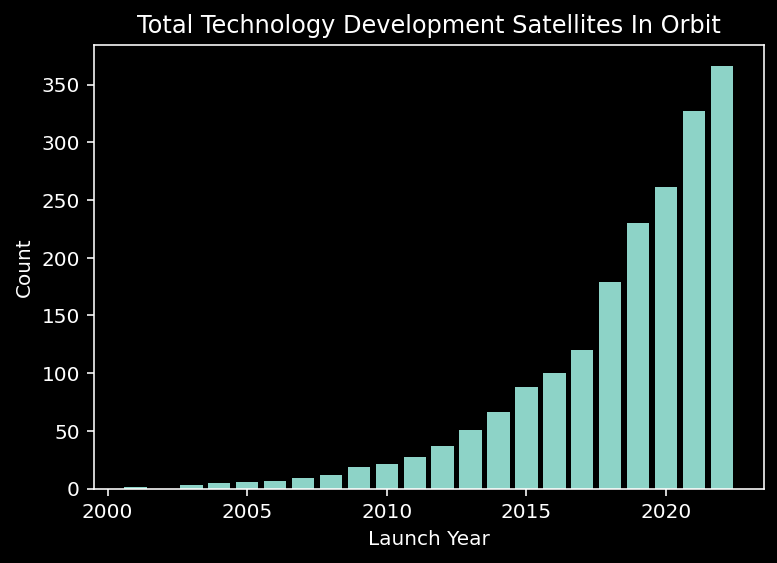

In [39]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(x=has_launch_date_year_counts.index, height=has_launch_date_year_counts['Technology Development'])
plt.xlabel('Launch Year')
plt.ylabel('Count')
plt.title('Total Technology Development Satellites In Orbit')
plt.style.use("dark_background")
ax.yaxis.set_major_formatter(thousands_format)
plt.show()

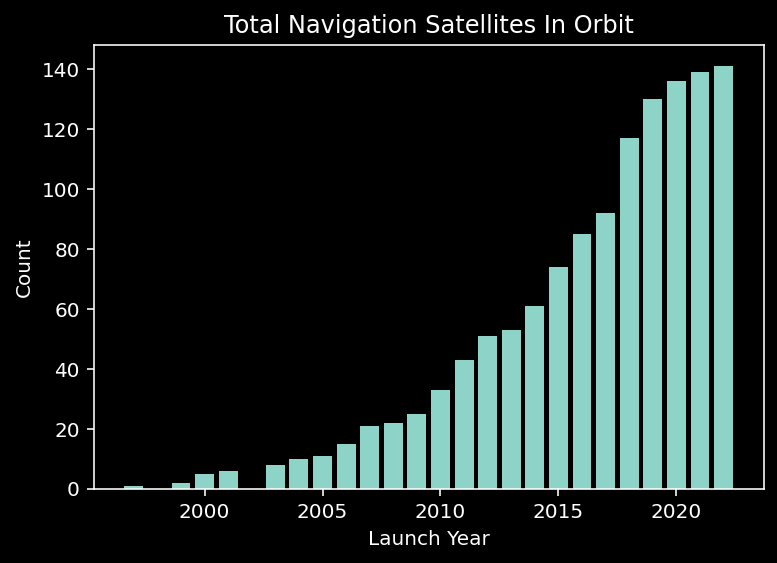

In [40]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(x=has_launch_date_year_counts.index, height=has_launch_date_year_counts['Navigation/Global Positioning'])
plt.xlabel('Launch Year')
plt.ylabel('Count')
plt.title('Total Navigation Satellites In Orbit')
plt.style.use("dark_background")
ax.yaxis.set_major_formatter(thousands_format)
plt.show()

#### Who operates/owns most of the satellites?

In [41]:
countries = df['Country of Operator/Owner'].value_counts()
top_countries = countries[:35]
# need to map each name to a different color
palette = ['#00ff00',
          '#8a2be2',
          '#f4a460',
          '#dc143c',
          '#0000ff',
          '#da70d6',
          '#ff00ff',
          '#1e90ff',
          '#00ff7f',
          '#db7093',
          '#f0e68c',
          '#fa8072',
          '#b0e0e6',
          '#ff1493',
          '#7b68ee',
          '#98fb98',
          '#7fffd4',
          '#ffc0cb',
          '#696969',
          '#556b2f',
          '#8b0000',
          '#808000',
          '#483d8b',
          '#008000',
          '#3cb371',
          '#008080',
          '#4682b4',
          '#9acd32',
          '#00008b',
          '#7f007f',
          '#d2b48c',
          '#ff4500',
          '#00ced1',
          '#ffa500',
          '#ffd700']

countries_colors = dict(zip(top_countries.keys(),palette))

df['Color'] = df['Country of Operator/Owner'].map(countries_colors)

# https://stackoverflow.com/questions/61919884/mapping-wordcloud-color-to-a-value-for-sentiment-analysis
# https://stackoverflow.com/questions/70883110/python-wordcloud-how-to-make-the-word-colour-based-on-a-data-column
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping
       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.
       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, words_to_colors, column1, column2, default_color):
        self.word_to_color = words_to_colors
        self.default_color = default_color
        self.column1 = column1
        self.column2 = column2

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(df[df[self.column1] == word][self.column2].value_counts().keys()[0], self.default_color)

In [42]:
def plot_word_cloud_dict_colormapped(d, color_fun, title, offset):
  wordcloud = WordCloud(collocations=False,width=1600, height=800, prefer_horizontal=1, min_font_size=6).generate_from_frequencies(d)
  wordcloud.recolor(color_func=color_fun)
  # plot the WordCloud image
  plt.figure(figsize=(14,10))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title(title)
  legend_elements = [Patch(facecolor=list(color_fun.word_to_color.values())[:26][i],label=list(color_fun.word_to_color.keys())[:26][i]) for i in range(26)]
  plt.legend(handles=legend_elements,bbox_to_anchor=(offset, 1))
  plt.show()

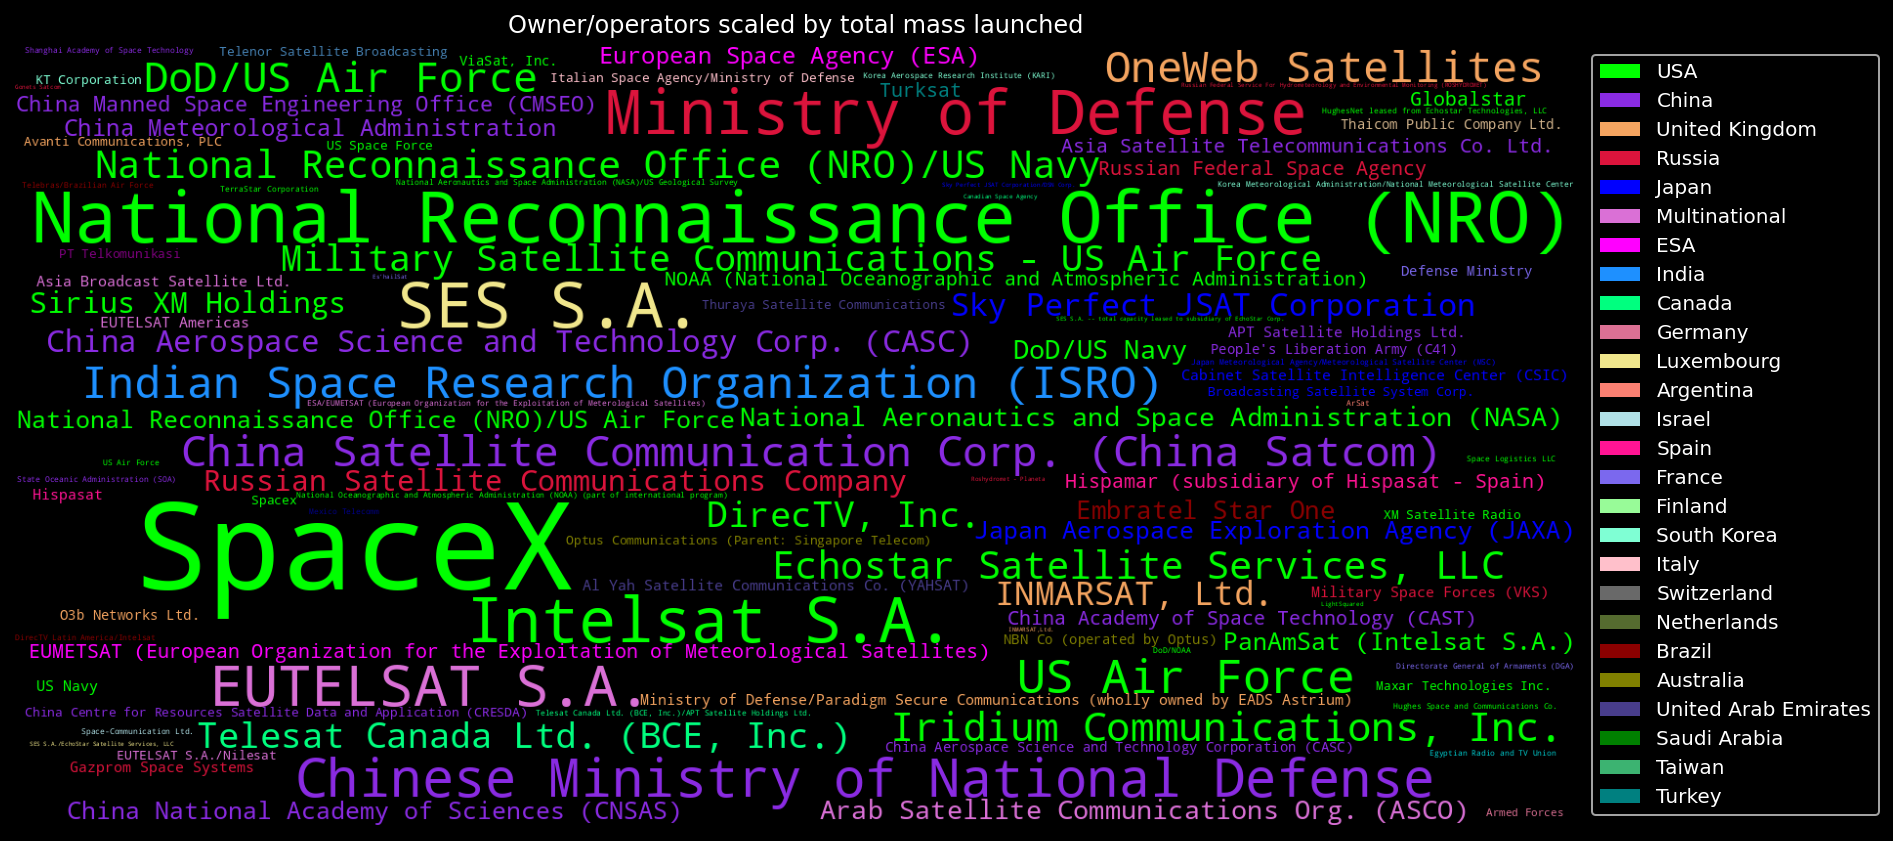

In [43]:
mass_owner_df = df[['Operator/Owner','MassKg']].groupby(['Operator/Owner']).sum()
mass_owner_df = mass_owner_df[mass_owner_df['MassKg'] > 0]
mass_owner_df['MassKg'] = mass_owner_df['MassKg'].astype(int)
mass_owner_dict = mass_owner_df.to_dict(index=['Operator/Owner'])['MassKg']
mass_owner_dict

grouped_color_func_owner = SimpleGroupedColorFunc(countries_colors, 'Operator/Owner', 'Country of Operator/Owner', '#000000')

plot_word_cloud_dict_colormapped(mass_owner_dict,grouped_color_func_owner,'Owner/operators scaled by total mass launched', 1.2)

#### Who manufactured most of the satellites?

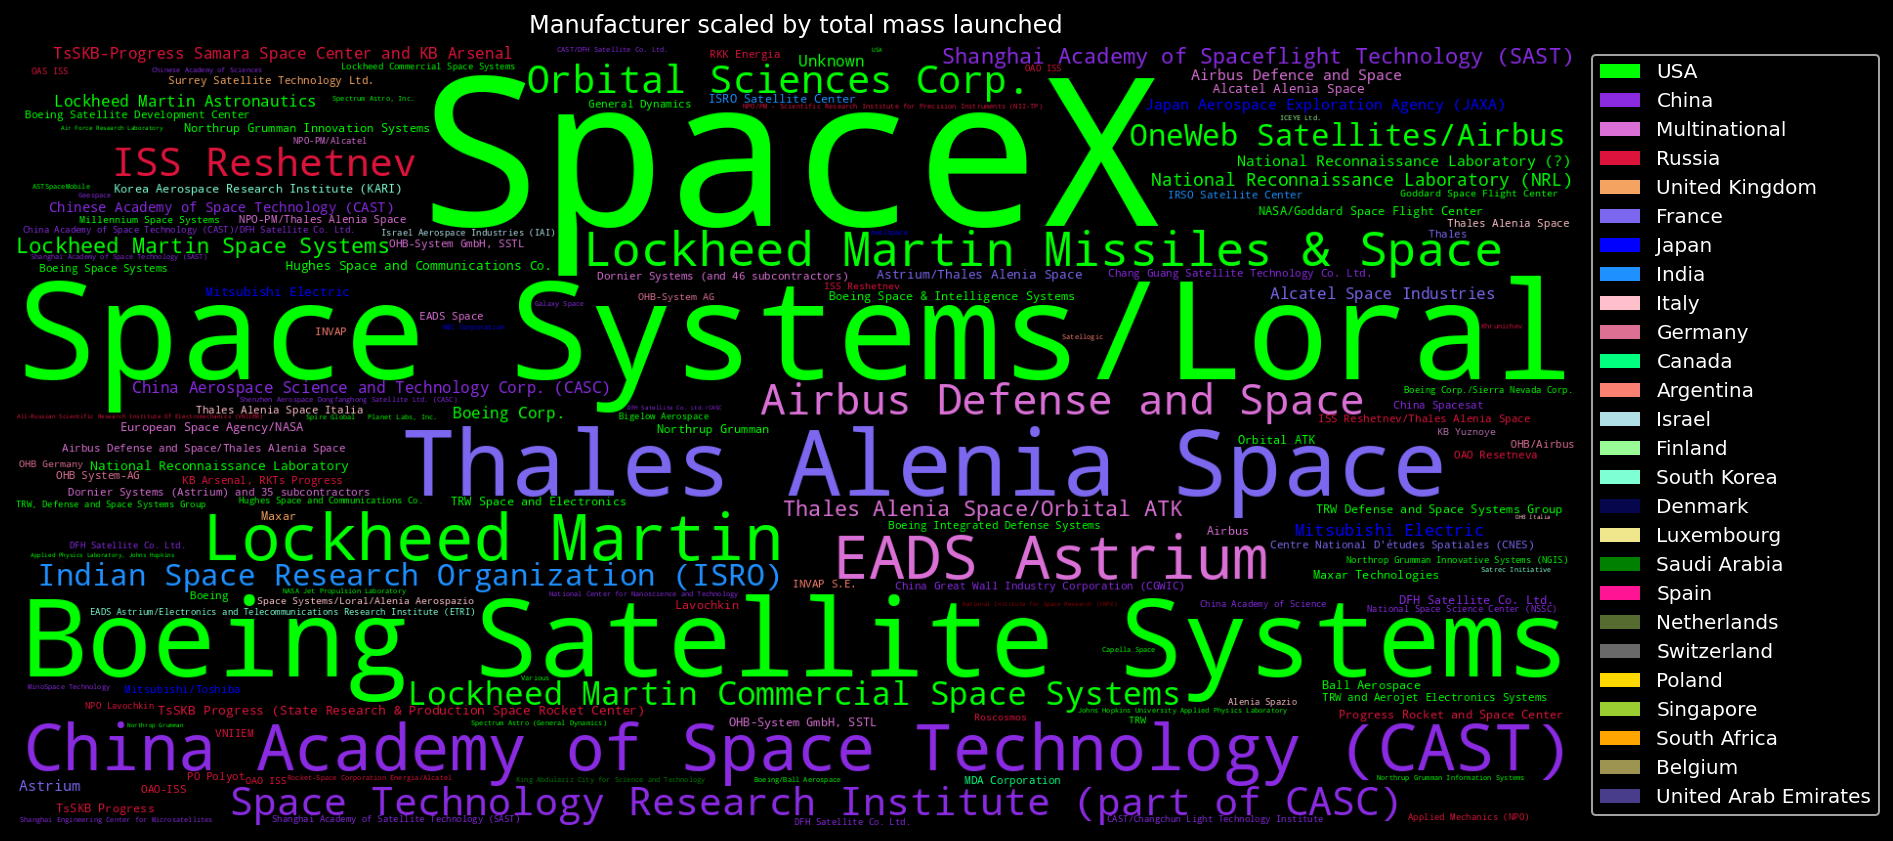

In [44]:
mass_contractor_df = df[['Contractor','MassKg']].groupby(['Contractor']).sum()
mass_contractor_df = mass_contractor_df[mass_contractor_df['MassKg'] > 0]
mass_contractor_df['MassKg'] = mass_contractor_df['MassKg'].astype(int)
mass_contractor_dict = mass_contractor_df.to_dict(index=['Contractor'])['MassKg']
mass_contractor_dict

replacement_dict = {
    'UK': 'United Kingdom',
    'International': 'Multinational',
    '/Italy': 'Italy',
    '/Thales Alenia Space': 'France',
    'France/Italy': 'Multinational',
    'France/UK/Germany/Spain':'Multinational',
    'Germany/UK':'Multinational',
    'France/UK/Germany':'Multinational',
    'Russia/France':'Multinational',
    'Germany/UK/Italy':'Multinational',
    'United States':'USA',
    'Denmark/Canada':'Multinational'
}

df['Country of Contractor'] = df['Country of Contractor'].replace(replacement_dict)

contractor_countries = df['Country of Contractor'].value_counts()
top_contractor_countries = contractor_countries[:33]
top_contractor_countries

# Maintain the color coding for countries and add other needed ones
extra_colors = {
'Denmark':'#06064c',
'Belgium':'#9d9452',
'Ukraine':'#b46fa9',
'Lithuania':'#4de091'
# '#5ac3de',
# '#07bf65',
# '#2340d2',
# '#445990',
# '#f829e9',
# '#8aa6ea',
}

palette2 = [(countries_colors[x] if x in countries_colors else extra_colors[x]) for x in top_contractor_countries.keys()]
contractor_countries_colors = dict(zip(top_contractor_countries.keys(),palette2))

grouped_color_func_contractor = SimpleGroupedColorFunc(contractor_countries_colors, 'Contractor','Country of Contractor', '#000000')

plot_word_cloud_dict_colormapped(mass_contractor_dict, grouped_color_func_contractor,'Manufacturer scaled by total mass launched', 1.2)

#### Which countries have launched the most satellites? [BAR CHART]

#### What is the distribution of satellite altitudes? [HISTOGRAM]

#### Plot expected lifetime vs date of launch. Are the expected lifetimes getting shorter? [SCATTER PLOT WITH REGRESSION]

## Inferential questions

#### The mean mass of satellites owned by US entities is greater than the mean mass of all satellites.
<ul><u>One-tailed z-test</u>
<li>$H_0$:  $\bar{x} = \mu$</li>
<li>$H_1$:  $\bar{x} > \mu$</li>
<li>$\alpha = 0.05$</li>
</ul>

#### The proportion of satellites with an inclination greater than 45 degrees is different between satellites owned by US and Chinese entities.
<ul><u>Two-proportion z-test</u>
<li>$H_0$:  $p_U = p_C $</li>
<li>$H_1$:  $p_U \neq p_C$</li>
<li>$\alpha = 0.05$</li>
</ul>

#### The mean period of satellites in low earth orbit is different from those in geostationary orbit.
<ul><u>Two-tailed t-test</u>
<li>$H_0$: $\bar{x} = \mu$ </li>
<li>$H_1$: $\bar{x} \neq \mu$ </li>
<li>$\alpha = 0.05$</li>
</ul>